In [ ]:
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten,GlobalAveragePooling2D
from keras.models import Sequential,Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import os
import matplotlib.pyplot as plt


In [ ]:
train_gen = ImageDataGenerator(rescale=1/255.0,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2)
train = train_gen.flow_from_directory(
    "../ROCK-PAPER-SCISSOR/rps/rps",
    target_size=(64,64),
    class_mode="categorical",
    shuffle=True
)

test_gen = ImageDataGenerator(rescale=1/255.0)
test = test_gen.flow_from_directory(
    "../ROCK-PAPER-SCISSOR/rps-test-set/rps-test-set",
    target_size=(64,64),
    class_mode="categorical",
    shuffle=True
)

pred_gen = ImageDataGenerator(rescale=1/255.0)
pre = pred_gen.flow_from_directory(
    "../ROCK-PAPER-SCISSOR/rps-val-set",
    target_size=(64,64),
    
)



Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Found 33 images belonging to 1 classes.


In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16(include_top=False,input_shape=(64,64,3))

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [ ]:
for i in model.layers[:-1]:
  i.trainable=False

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [ ]:
a= GlobalAveragePooling2D()(model.output)
b=Dropout(0.5)(a)
c=Dense(16,activation='relu')(b)
e=Dropout(0.3)(c)
f=Dense(3,activation='softmax')(e)
model_new = Model(inputs=model.input, outputs=f)
model_new.summary()

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)     

In [ ]:
adam = Adam(learning_rate=0.0009)
model_new.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
model_check= ModelCheckpoint("../ROCK-PAPER-SCISSOR/model_VGG.h5",monitor="val_loss",verbose=True,save_weights_only=True,mode='min')
callback =EarlyStopping(monitor='val_loss',patience=2,mode='min')
his=model_new.fit_generator(train,epochs=50,validation_data= test, callbacks=[model_check,callback])

Epoch 1/50
79/79 [==============================] - ETA: 0s - loss: 0.3014 - accuracy: 0.8913
Epoch 00001: saving model to /content/drive/My Drive/PROJECTS/ROCK-PAPER-SCISSOR/model_VGG.h5
79/79 [==============================] - 21s 268ms/step - loss: 0.3014 - accuracy: 0.8913 - val_loss: 0.4176 - val_accuracy: 0.7984
Epoch 2/50
79/79 [==============================] - ETA: 0s - loss: 0.2766 - accuracy: 0.9012

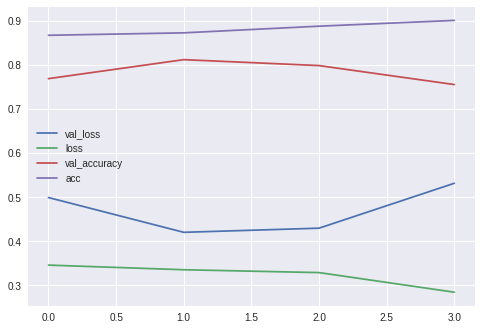

In [ ]:
plt.style.use("seaborn")
plt.plot(his.history['val_loss'],label='val_loss')
plt.plot(his.history['loss'],label='loss')
plt.plot(his.history['val_accuracy'],label="val_accuracy")
plt.plot(his.history['accuracy'],label='acc')
plt.legend()
plt.show()

In [ ]:
model_new.evaluate(train)

79/79 [==============================] - 16s 204ms/step - loss: 0.1315 - accuracy: 0.9671


[0.1314919888973236, 0.9670634865760803]

In [ ]:
model_new.evaluate(test)

12/12 [==============================] - 2s 144ms/step - loss: 0.5316 - accuracy: 0.7554


[0.5316319465637207, 0.7553763389587402]

In [ ]:
import numpy as np
x=model_new.predict(pre)
x=[np.argmax(i) for i in x]

In [ ]:
print(x[:5])

[1, 2, 2, 2, 1]


In [ ]:
np.unique(x)

array([0, 1, 2])

In [ ]:
dictionary={
    "0": "PAPER",
    "1": 'ROCK',
    "2": 'SCISSORS'
}

In [ ]:
c=0
prediction = []
for i in os.listdir("../ROCK-PAPER-SCISSOR/rps-val-set/rps-validation"):
  img=image.load_img('../PROJECTS/ROCK-PAPER-SCISSOR/rps-val-set/rps-validation/'+i)
  img=image.img_to_array(img)/255.0
  plt.imshow(img)
  plt.axis("off")
  plt.show()
  j = dictionary[str(x[c])]
  print(j)
  prediction.append(j)
  c=c+1

Output hidden; open in https://colab.research.google.com to view.